<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure: 

<div style="color:#00BFFF">

### About the Data

#### Primary Dataset Description

**Short Description:** The primary dataset is "Table 1.1.5. Gross Domestic Product" from the U.S. Bureau of Economic Analysis. It comprises seasonally adjusted quarterly U.S. Gross Domestic Product (GDP) rates in billions of dollars.

**Relevance:** The dataset's detailed information on U.S. GDP over several years is integral to the project's goal of nowcasting consumption. The data's granularity and time-series nature will allow for comprehensive analysis and identification of trends, making it pivotal for the project's success.

**Data frequency:** The data reflecting the economic output of the United States is crucial for analyzing economic trends and growth patterns. The presentation of data is done quarterly by the GDP component.

**Location:** Available at [U.S. Bureau of Economic Analysis](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*j1lvlb*_ga*MTk0MDMyMjk0MC4xNzA1NDk1NTk4*_ga_J4698JNNFT*MTcwNTQ5NTU5OC4xLjEuMTcwNTQ5NzA2MC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjUiXSxbIkZpcnN0X1llYXIiLCIxOTQ3Il0sWyJMYXN0X1llYXIiLCIyMDIzIl0sWyJTY2FsZSIsIi05Il0sWyJTZXJpZXMiLCJRIl1dfQ==). ([BEA](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*j1lvlb*_ga*MTk0MDMyMjk0MC4xNzA1NDk1NTk4*_ga_J4698JNNFT*MTcwNTQ5NTU5OC4xLjEuMTcwNTQ5NzA2MC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjUiXSxbIkZpcnN0X1llYXIiLCIxOTQ3Il0sWyJMYXN0X1llYXIiLCIyMDIzIl0sWyJTY2FsZSIsIi05Il0sWyJTZXJpZXMiLCJRIl1dfQ==))

**Format:** CSV

**Access Method:** The dataset is readily available and can be easily accessed and downloaded directly from the U.S. Bureau of Economic Analysis website.


#### Secondary Datasets

##### Federal Reserve Economic Data (FRED)

**Short Description:** This dataset is sourced from the Federal Reserve Bank of St. Louis's FRED macroeconomic database. It contains a variety of economic data points available at monthly intervals, with a particular focus on US GDP data. The data covers consumer spending indicators, a crucial component of the Gross Domestic Product (GDP).

**Relevance**: Complements the primary dataset with additional economic indicators, useful for cross-referencing and correlation analysis.

**Data frequency:** The monthly frequency of this dataset provides a more detailed temporal resolution than the primary dataset, which may reveal more immediate economic trends. This granularity will be useful in identifying more immediate proxies for nowcasting.

**Estimated Size**: 0.6MB

**Location**: https://research.stlouisfed.org/econ/mccracken/fred-databases/

**Format**: CSV.

**Access Method**: Direct download.

<div style="color:#00BFFF">

### Setup Environment and import libraries

In [1]:
# Activate the virtual environment by running in terminal: 
# python -m venv myenv
# source myenv/bin/activate
# ! source /myenv/bin/activate

# ------- PIP INSTALLS -------
# ! pip install --upgrade pip
# ! pip install -r requirements.txt

# Run the imports file
%matplotlib inline

In [2]:
# ------- Standard Library Imports -------
import warnings
from pprint import pprint
# from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt

# Remove warnings
warnings.filterwarnings('ignore')

# Set the display options
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_40691/615382996.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div style="color:#00BFFF">

### Load datasets

<div style="color:#00BFFF">

##### Load and preprocesses BEA Dataset


**Loads and preprocesses** the GDP data from a CSV file. Process a DataFrame to create a structured description column.

**Handling Missing Values**: Utilize median imputation for missing values, as it's less influenced by outliers and provides a more representative central tendency.

**Outliers and Anomalies**: Apply Interquartile Range (IQR) or Z-score analysis to identify and address outliers. This step ensures the integrity of data by minimizing the impact of extreme values.

In [3]:
from utils.bea_load_data import load_and_preprocess_gdp_data,create_structured_description, create_short_description, transform_date_formats

file_path = './data/bea/bea_usgdp.csv'

# Load and preprocess the data
pce_df = load_and_preprocess_gdp_data(file_path)

# create hierarchy for GDP data
pce_df = create_structured_description(pce_df)

# create short description for GDP data
pce_df = create_short_description(pce_df)

#extract only PCE data
pce_df = pce_df[pce_df['short_description'].str.contains('PCE')]

# Transform the date formats
pce_df = transform_date_formats(pce_df)

#save the data
pce_df.to_csv('./results/bea/bea_pce_original.csv', index=False)

In [4]:
pce_df.head()

short_description,PCE,PCE_Goods,PCE_Goods_Durable_goods,PCE_Goods_Nondurable_goods,PCE_Services
1947Q1,156.2,95.6,20.7,74.9,60.6
1947Q2,160.0,98.2,21.4,76.9,61.8
1947Q3,163.5,100.4,21.8,78.6,63.1
1947Q4,167.7,103.5,23.5,80.0,64.2
1948Q1,170.4,105.1,23.5,81.5,65.3


<div style="color:#00BFFF">

##### Visualy inspect the BEA data


The rate of change is typically calculated as 
(
Current Value
−
Previous Value
Previous Value
)
×
100
%
( 
Previous Value
Current Value−Previous Value
​	
 )×100%, which can be easily computed using the pct_change() function in pandas, and then multiplying by 100 to convert it to a percentage.

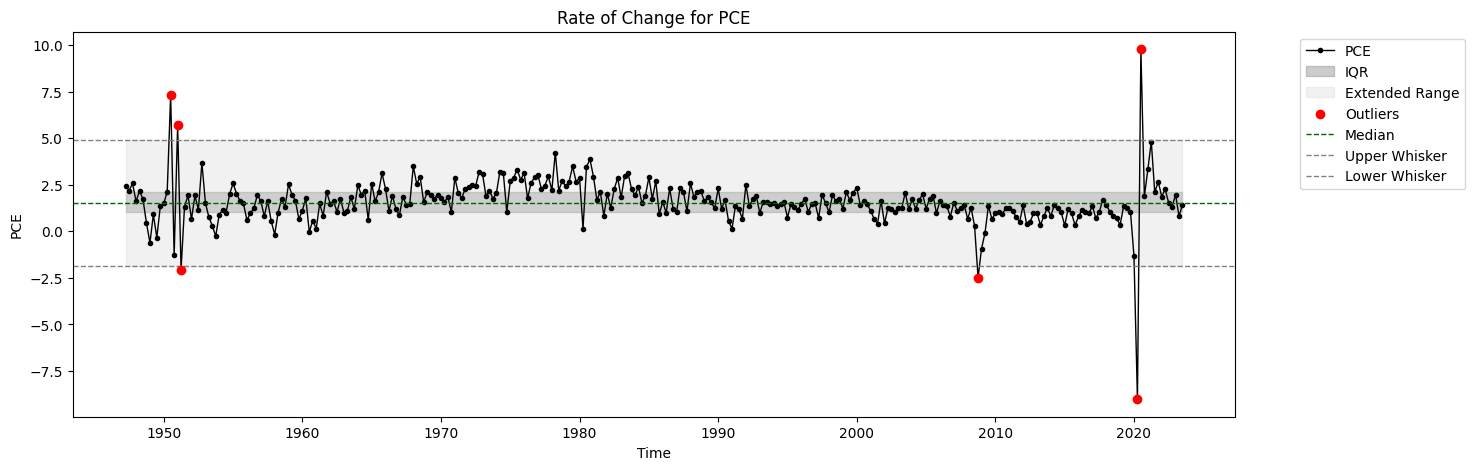

In [5]:
from pandas.tseries.offsets import MonthBegin

def standardize_datetime_index(index):
    standardized_dates = []
    
    # Check if the index is a PeriodIndex and convert to Timestamp if necessary
    if isinstance(index, pd.PeriodIndex):
        return index.to_timestamp()
    
    # If the index is not a PeriodIndex, handle individual entries
    for date_str in index:
        if isinstance(date_str, pd.Period):
            # Convert Period to Timestamp
            standardized_date = date_str.to_timestamp()
        elif "Q" in str(date_str):
            # Handle quarterly data
            year, quarter = str(date_str).split("Q")
            month = (int(quarter) - 1) * 3 + 1
            standardized_date = pd.Timestamp(year=int(year), month=month, day=1)
        else:
            # For other formats, directly convert to datetime
            standardized_date = pd.to_datetime(date_str, errors='coerce')
        standardized_dates.append(standardized_date)
    
    return pd.to_datetime(standardized_dates)

def plot_time_series_with_iqr_and_extended_range_subplot(df, ax, column):
    # Use the index as it is already in datetime format
    datetime_index = standardize_datetime_index(df.index)
    df.index = datetime_index

    # Calculate statistics
    median = df[column].median()
    std = df[column].std()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = median - 2.698 * std
    upper_whisker = median + 2.698 * std
    
    # Plot the time series line graph
    ax.plot(datetime_index, df[column], marker='o', markersize=3, color='black', linewidth=1, label=column)

    # Shade the IQR
    ax.fill_between(datetime_index, Q1, Q3, color='grey', alpha=0.4, label='IQR')
    
    # Shade the extended range
    ax.fill_between(datetime_index, lower_whisker, upper_whisker, color='lightgrey', alpha=0.3, label='Extended Range')
    
    # Mark potential outliers
    outliers = df[column][(df[column] < lower_whisker) | (df[column] > upper_whisker)]
    ax.scatter(outliers.index, outliers, color='red', zorder=5, label='Outliers')

    # Add median line
    ax.axhline(median, color='darkgreen', linestyle='--', linewidth=1.0, label='Median')
    
    # Add upper and lower whiskers lines
    ax.axhline(upper_whisker, color='grey', linestyle='--', linewidth=1, label='Upper Whisker')
    ax.axhline(lower_whisker, color='grey', linestyle='--', linewidth=1, label='Lower Whisker')

    # Add labels and legend
    ax.set_xlabel('Time')
    ax.set_ylabel(column)
    ax.set_title(f'{column}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(False)

def analyze_and_plot(pce_df,indicator_name):
    """
    Function to analyze and plot data from the given DataFrame.
    """

    # Calculate the rate of change for each column
    pce_real_growth = pce_df.pct_change().dropna() * 100

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(15, 5))

    # Call the plotting function
    plot_time_series_with_iqr_and_extended_range_subplot(pce_real_growth, ax, indicator_name)

    ax.set_title(f'Rate of Change for {indicator_name}')
    plt.show()

# Call the function and store the result in result
result = analyze_and_plot(pce_df,'PCE')

**Interpretation of Scatter Plots with Regression Lines:**

Scatter plots with regression lines for each component ('PCE_Goods_Durable_goods', 'PCE_Goods_Nondurable_goods', 'PCE_Services') against 'PCE' illustrate the linear relationships between these components and the total PCE. The regression lines provide a visual indicator of the direction, strength, and linearity of these relationships.

**Interpretation of the Correlation Matrix:**

The correlation matrix, particularly its visualization through the heatmap, shows the Pearson correlation coefficients between 'PCE' and its components. The coefficients near 1 indicate a very strong positive linear relationship.

<div style="color:#00BFFF">

##### Loading the FRED data

The `load_fredmd_data` function, below, performs the following actions, once for the FRED-MD dataset and once for the FRED-QD dataset:

1. Based on the `vintage` argument, it downloads a particular vintage of these datasets from the base URL https://files.stlouisfed.org/files/htdocs/fred-md into the `orig_m` variable.
2. Extracts the column describing which transformation to apply, shortname and description mappings
3. Extracts the observation date (from the "sasdate" column) and uses it as the index of the dataset.

In [6]:
def load_fredmd_data(vintage):
    """
    Loads and processes the FRED-MD data.
    """
    # Define the base URL for the FRED-MD dataset
    base_url = 'https://files.stlouisfed.org/files/htdocs/fred-md'

    # Load the dataset for the specified 'vintage', dropping rows that are entirely NA
    fred_orig = pd.read_csv(f'{base_url}/monthly/{vintage}.csv').dropna(how='all')

    # Extract transformation codes (second column onwards) from the first row
    transform_info = fred_orig.iloc[0, 1:]

    # Drop the first row (containing transformation info) from the dataset
    fred_orig = fred_orig.iloc[1:]

    # Convert 'sasdate' column to a PeriodIndex with monthly frequency for time-series analysis
    fred_orig.index = pd.PeriodIndex(fred_orig.sasdate.tolist(), freq='M')

    # Remove the 'sasdate' column as it's now set as the index
    fred_orig.drop('sasdate', axis=1, inplace=True)

    # Return the processed data and the transformation information
    return fred_orig, transform_info


# Load data for the current vintage and unpack into original data and transformation info
fred, transform_info = load_fredmd_data("current")

# Save the original data
fred.to_csv('./results/fred/fred_monthly_orig.csv', index=True)

fred.head(2)

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,HWI,HWIURATIO,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,PERMIT,PERMITNE,PERMITMW,PERMITS,PERMITW,ACOGNO,AMDMNOx,ANDENOx,AMDMUOx,BUSINVx,ISRATIOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,NONREVSL,CONSPI,S&P 500,S&P: indust,S&P div yield,S&P PE ratio,FEDFUNDS,CP3Mx,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,COMPAPFFx,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,TWEXAFEGSMTHx,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAUCSL,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
1959-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9665,23.3891,22.2688,31.7011,19.0149,38.1501,8.0434,20.0387,11.9952,30.6591,20.8382,19.9173,34.6654,80.1973,1357,0.333579,67936,63868,6.0,16.3,1574,1169,1396,594,802,291078,52478,18796,713.0,2993,14998,8740,6258,33682,10774,2568.7,5350.3,2418,8105,39.8,2.5,40.2,1657,350,452,505,350,NaN,NaN,NaN,NaN,NaN,NaN,14716.48296,NaN,42620.34624,84889.55898,1.560000,138.9,286.6,987.9,50500,18.9,18300,35.2130,24.9242,48.96116,0.124965,55.62,59.30,3.158342,18.445741,2.48,3.30,2.82,3.09,3.36,4.01,4.02,4.12,4.87,0.82,0.34,0.61,0.88,1.53,1.54,1.64,2.39,NaN,4.3122,359.8417,2.8065,0.9671,33.1,33.4,30.6,31.6,3.0,32.5,29.01,44.8,29.3,21.1,33.3,38.1,22.9,28.9,30.7,29.6,15.164,63.517,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3966,23.7048,22.4617,31.9337,19.1147,38.5147,8.1510,20.6733,12.5477,31.1959,21.2213,19.8631,34.1932,81.4428,1421,0.358386,67649,63684,5.9,15.5,1554,1164,1277,545,732,282958,52688,18890,704.2,2980,15115,8839,6276,33798,10816,2575.4,5381.3,2420,8116,39.7,2.6,40.3,1667,346,469,508,344,NaN,NaN,NaN,NaN,NaN,NaN,15400.24873,NaN,43677.15151,85181.81131,1.539338,139.4,287.7,992.1,49800,18.6,18100,35.2201,25.2270,49.51371,0.125765,54.77,58.33,3.219518,18.418119,2.43,3.26,2.70,3.13,3.54,3.96,3.96,4.14,4.89,0.83,0.27,0.70,1.11,1.53,1.53,1.71,2.46,NaN,4.3133,359.8417,2.8093,0.9748,33.2,33.4,30.7,31.4,3.0,32.5,29.00,44.7,29.4,21.2,33.3,38.1,23.0,28.9,30.7,29.6,15.179,63.554,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN


<div style="color:#00BFFF">

##### Mapping FRED indices to Economic Data groups for analysis per economic group

In this section, we import and organize the definitions of economic variables. 
These definitions are loaded from CSV files corresponding to the FRED-MD and FRED-QD databases. 
This process ensures that we have a clear and concise understanding of each economic variable in our dataset, which is essential for accurate analysis and interpretation of the data.

In [7]:
# Function for Column Name Mapping
def map_column_names(data, defn_file):
    """
    Maps FRED-MD column names to their descriptions.
    """
    # Load the definitions file, ignoring encoding errors
    defn = pd.read_csv(defn_file, encoding_errors='ignore')

    # Set the 'fred' column as the index of the definitions DataFrame
    defn.index = defn.fred

    # Filter the definitions to include only those variables present in the data columns
    defn = defn.loc[data.columns.intersection(defn.fred), :]

    # Create a dictionary mapping FRED-MD variable names to their descriptions
    map_dict = defn['description'].to_dict()

    # Replace the names of columns in the dataset with the descriptions from the map
    return data[map_dict.keys()].rename(columns=map_dict),defn

# Map column names for fred_original 
column_defn_file = './data/FRED/FRED_Definitions_Mapping/fredmd_definitions.csv'
fred_orig,defn = map_column_names(fred, column_defn_file)

fred_orig.head(2)

,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Consumer Goods,New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
1959-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9

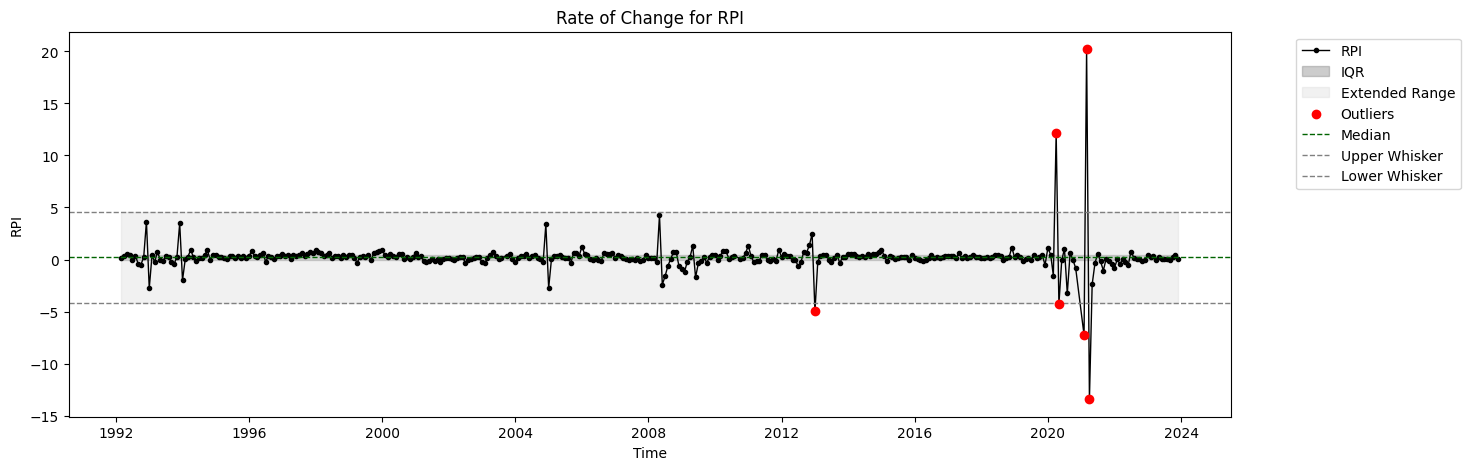

In [8]:
analyze_and_plot(fred,'RPI')
# analyze_and_plot(fred,'INDPRO')
# analyze_and_plot(fred,'UNRATE')
# analyze_and_plot(fred,'UMCSENTx')

<div style="color:#00BFFF">

### Frequency Alignment and Intergration

<div style="color:#00BFFF">

##### Frequency Alignment: 
</div>
- Transform the monthly economic indices from FRED to a quarterly format to align with the BEA’s quarterly GDP data. Calculate the sum or average (as appropriate) of monthly values within each quarter. 


In [9]:
# Function to transform monthly date to quarterly date in 'YYYYQX' format
def transform_to_quarterly(date_str):
    year, month = date_str.split('-')
    quarter = (int(month) - 1) // 3 + 1
    return f"{year}Q{quarter}"

# Convert index to string to apply string methods
fred_orig.index = fred_orig.index.astype(str)

# Selecting only the last month of each quarter from the monthly dataset
# The last month of each quarter are March (03), June (06), September (09), December (12)
fred_orig_filtered = fred_orig[fred_orig.index.str.endswith(('03', '06', '09', '12'))]

# Transform the index to the quarterly format and create a new 'Quarter' column
fred_orig_filtered['Quarter'] = fred_orig_filtered.index.map(transform_to_quarterly)

# Set the new 'Quarter' column as the index
fred_orig_filtered.set_index('Quarter', inplace=True)

# Checking the date range of the monthly dataset
monthly_date_range = fred_orig_filtered.index.min(), pce_df.index.max()

# Checking the date range of the PCE dataset
pce_date_range = pce_df.index.min(), pce_df.index.max()

monthly_date_range, pce_date_range



(('1959Q1', '2023Q3'), ('1947Q1', '2023Q3'))

<div style="color:#00BFFF">

##### Quarterly Data Integration

</div>
- We will merge quarterly BEA PCE rate of change data framework with the FRED transformed quarter-over-quarter rate of change into a unified framework using pandas, ensuring seamless integration and compatibility. 
- This step is vital for consolidating different economic indicators into a single, comprehensive analysis.

In [10]:
# drop columns PCE_Goods	PCE_Goods_Durable_goods	PCE_Goods_Nondurable_goods	PCE_Services
pce_df.drop(['PCE_Goods', 'PCE_Goods_Durable_goods', 'PCE_Goods_Nondurable_goods', 'PCE_Services'], axis=1, inplace=True)

#drop rows in pce_df that are not in fred_orig_filtered
pce_df = pce_df[pce_df.index.isin(fred_orig_filtered.index)]

# Merging the datasets on the 'Quarter' column
joined_dataset = pd.merge(pce_df, fred_orig_filtered, left_index=True, right_index=True, how='left')

# Display the first few rows of the merged dataset
joined_dataset.to_csv('fred_pce_joined.csv', index=True)



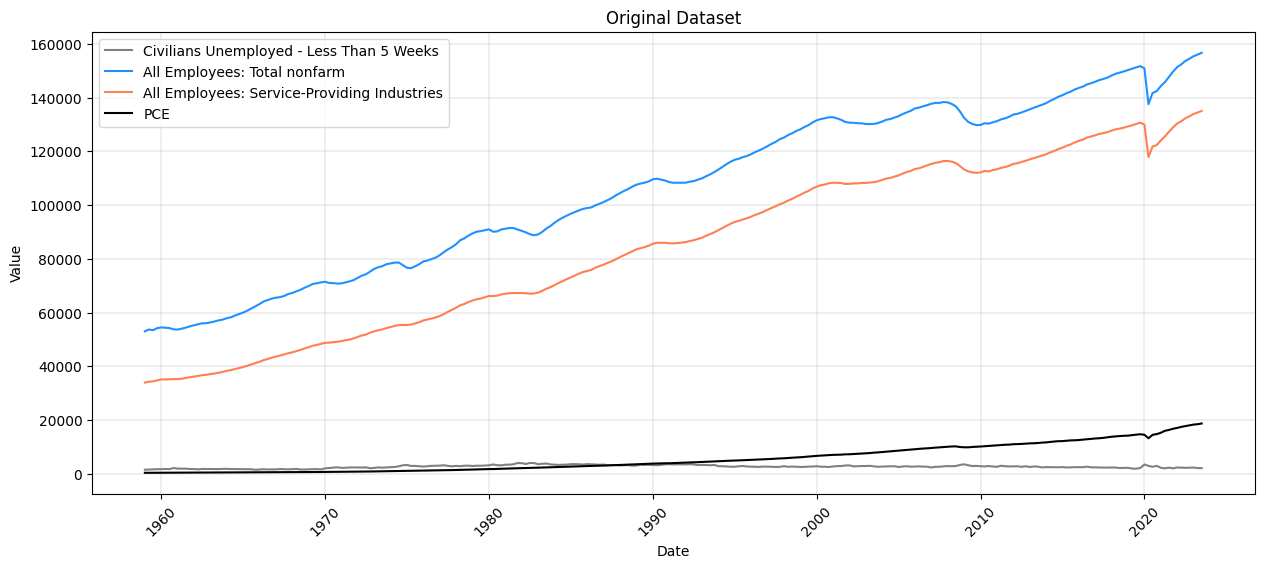

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

def convert_index_to_datetime(index):
    """Convert 'YYYYQX' format to datetime, or return the input if it's already a datetime."""
    if isinstance(index, pd.Timestamp):
        return index  # Return the input directly if it's already a Timestamp
    year = int(index[:4])
    quarter = int(index[5])
    month = (quarter - 1) * 3 + 1  # Convert quarter to month
    return pd.Timestamp(year=year, month=month, day=1)

def plot_dataset(dataset, title):
    # Convert index to datetime
    dataset.index = pd.to_datetime(dataset.index.map(convert_index_to_datetime))
    
    # Select random columns
    randint = np.random.randint(0, len(dataset.columns), 3)
    columns = dataset.columns[randint]
    
    #add 'PCE' to the columns
    columns = np.append(columns,'PCE')
    
    # Define color and style
    colors = ['grey', 'dodgerblue', 'coral','black']
    
    # Plot
    plt.figure(figsize=(15, 6))
    for i, column in enumerate(columns):
        plt.plot(dataset.index, dataset[column], label=column, color=colors[i])

    # Enhance the chart
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    
    # Adjust x-axis to show every 10 years
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(YearLocator(10))  # Set major ticks to every 10 years
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Format tick labels as year only
    
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linewidth=0.3)
    
    plt.show()


#plot after each transformation
plot_dataset(joined_dataset, "Original Dataset")

<div style="color:#00BFFF">

### Filtering the data on date range and indicators

<div style="color:#00BFFF">

##### Unit conversion


**Ensure consistent data scales** by standardizing measurement units across economic indicators.

**Steps**

1. **Import Metadata**
   - Load variable metadata from `fredmd_information.csv`.
   - Convert to a dictionary mapping variable descriptions to measurement units.

2. **Update Measurement Info**
   - Manually add measurement info for **PCE** as 'billions of dollars'.

3. **Visualize Measurement Units**
   - Create a DataFrame to display measurement units for each variable.
   - Facilitates understanding of data scale and units.

4. **Standardize Data Scales**
   - Define conversion factors to standardize data (e.g., converting thousands to millions, millions to billions).
   - Apply to relevant variables to ensure consistent analysis base.

5. **Mapping and Conversion**
   - Map dataset columns to their measurement units.
   - Apply conversion factors to adjust data scales where necessary.

In [12]:
# Create a dictionary mapping FRED-MD variable names to their descriptions
measuremnet_info = pd.read_csv('./data/fredmd_information.csv')
measure_type_dict = measuremnet_info.set_index('description')['measure'].to_dict()

# Add "PCE": 'billions of dollars' to the dictionary
measure_type_dict["PCE"] = 'billions of dollars'

#display the measure types in a dataframe
unique_measures = pd.DataFrame.from_dict(measure_type_dict, orient='index', columns=['measure'])
#unique_measures.head()

In [13]:
conversion_factors = {
    # Convert millions to billions
    'millions of dollars': 1e-3,  
    'millions of 2012 dollars, deflated by core pce': 1e-3,  
    'millions of chained 2012 dollars': 1e-3,  
    
    # # For non-monetary values, Convert thousands to millions (absolute numbers)
    # 'thousands of persons': 1e-3,  
    # 'thousands of units': 1e-3, 
    # 'thousands, seasonally adjusted annual rate': 1e-3,  
}

# Mapping column names in joined_dataset to their respective measures from defn_dataset
column_measures = {}
for col in joined_dataset.columns:
    if any(defn['fred'] == col):
        matching_rows = defn[defn['description'] == col]
        if not matching_rows.empty:
            measure_value = matching_rows['measure'].iloc[0]
            column_measures[col] = measure_value

# Apply conversion factors
for column, measure in column_measures.items():
    if measure in conversion_factors:
        joined_dataset[column] *= conversion_factors[measure]


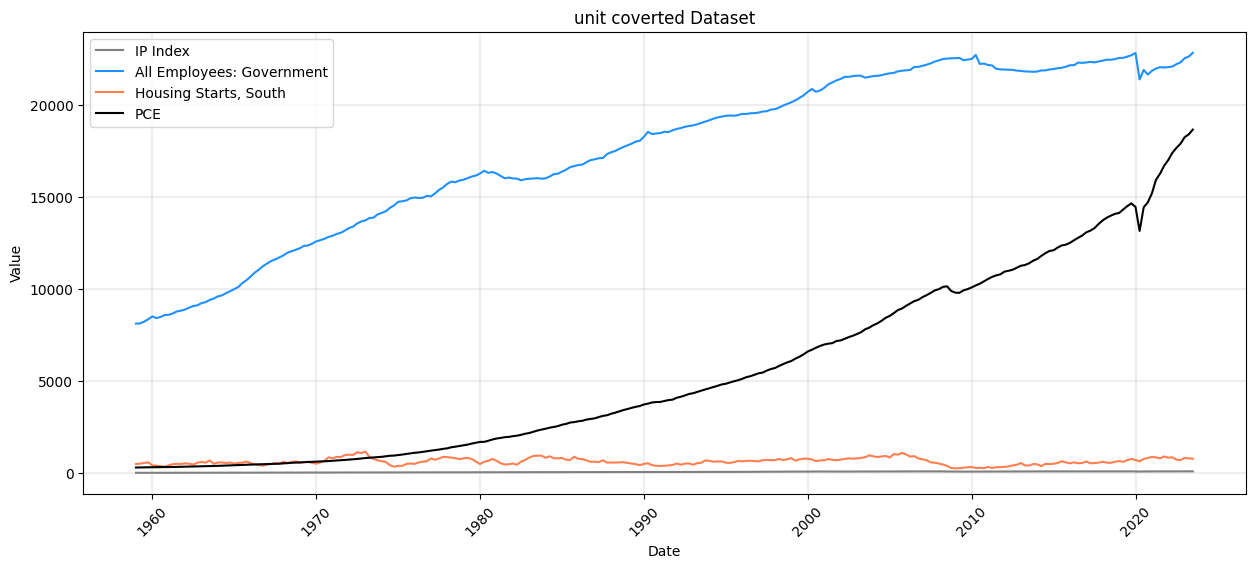

In [14]:
#plot after each transformation
plot_dataset(joined_dataset, "unit coverted Dataset")

<div style="color:#00BFFF">

##### Data Normalization

**Normalize the dataset** 
- Facilitate accurate comparisons and analysis across different economic indicators by normalizing the dataset to ensure all financial figures are in a comparable format.

   - Subtract the mean and divide by the standard deviation for each variable in the dataset.
   - Ensures data is centered around 0 and has a standard deviation of 1.

**Update Dataset**
   - The `normalized_df` is assigned back to `joined_dataset`.
   - Guarantees that subsequent analysis uses the normalized data.

In [15]:

# Normalize the dataset after conversion
normalized_df = (joined_dataset - joined_dataset.mean()) / joined_dataset.std()

# The normalized_df is now ready and should have all financial figures in a comparable format
joined_dataset = normalized_df.copy()

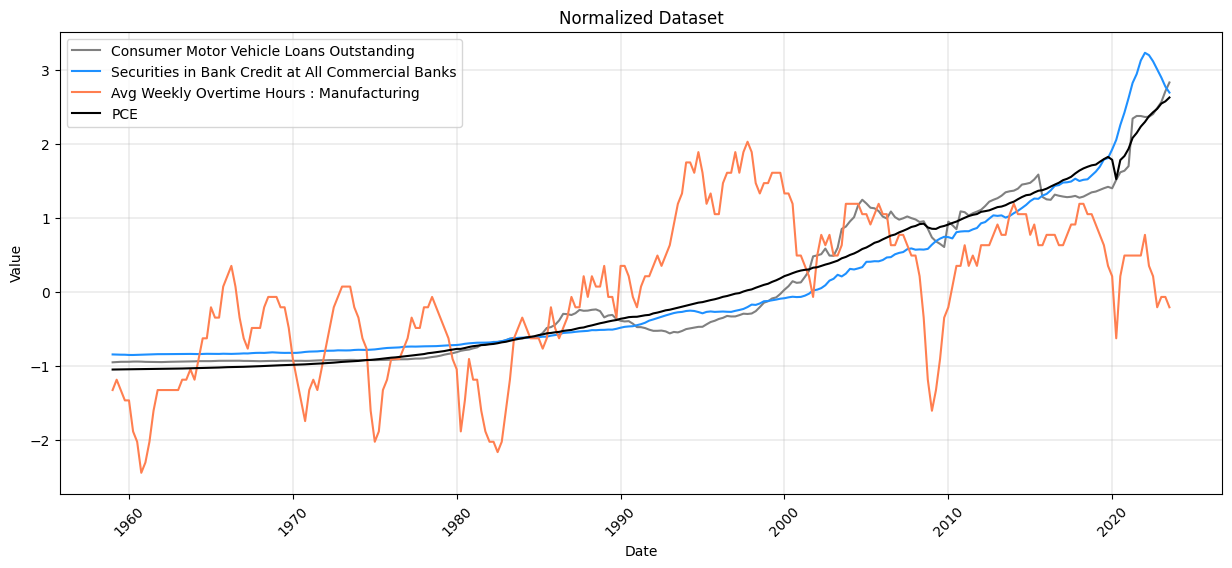

In [16]:
#plot after each transformation
plot_dataset(joined_dataset, "Normalized Dataset")

<div style="color:#00BFFF">

##### Filter Date Range

In [19]:
import pandas as pd

# Assuming joined_dataset's index is initially in 'YYYYQX' format,
# Ensure the index is in datetime format
joined_dataset.index = pd.to_datetime(joined_dataset.index.map(convert_index_to_datetime))

# Now, filter the data to include only observations from 1960 onwards
# This leverages the datetime format of the index for comparison
joined_dataset = joined_dataset[joined_dataset.index.year >= 1960]

# You can now proceed to use the plot_dataset function as before
# plot_dataset(joined_dataset, "Filtered Dataset")


<div style="color:#00BFFF">

##### Creating Composite indexes 

**Objective**
- **Reduce collinearity** among the 123 economic indicators in the dataset by creating composite indices. The dataset includes **multiple indicators that are components of each other**, covering totals and granular levels, or different measures providing similar information.
- **Creating composite indices** is a preemptive step to **decrease collinearity**, enhancing the effectiveness of our end model fitting. 
- This approach aims to consolidate related indicators into single measures, thereby simplifying the dataset and improving model interpretability and performance.

**Process**

**1. Create Composite Index**
   - Function `create_composite_index` averages or sums specified columns to form a new index.
   - Supports `mean` or `sum` methods to accommodate different types of aggregation as needed.

**2. Merge and Clean Data**
   - The `merge_and_clean_data` function incorporates composite indices into the main dataset.
   - Removes original indicators that are now aggregated, reducing dataset complexity and potential multicollinearity.
   - Drop granular indices and keep Total Indices

**3. Dataframe Update**
   - Post-merging, drops the aggregated columns from the `joined_dataset`.
   - Cleans the `defn` dataset to exclude removed indicators, maintaining dataset integrity and relevance.


In [20]:

def create_composite_index(dataframe, columns_to_combine, index_name,method='mean'):
    """
    Create a composite index by averaging specified columns in a dataframe.
    """
    if method == 'mean':
        composite = dataframe[columns_to_combine].mean(axis=1)
    elif method == 'sum':
        composite = dataframe[columns_to_combine].sum(axis=1)
    else:
        raise ValueError("Method must be 'mean' or 'sum'.")
    
    return pd.DataFrame({index_name: composite})

def merge_and_clean_data(joined_dataset, defn, composite_indices_info):
    """
    Merge the composite indices into the joined dataset and remove the old indicators.
    """
    # Create and merge each composite index into the main dataset
    for index_name, (columns, method) in composite_indices_info.items():
        composite_df = create_composite_index(joined_dataset, columns, index_name, method)
        joined_dataset = pd.merge(joined_dataset, composite_df, left_index=True, right_index=True, how='left')
    
    # Define columns to drop (those that have been aggregated into composite indices)
    columns_to_drop = [column for columns, _ in composite_indices_info.values() for column in columns]
    
    # Drop the original columns that are now represented by the composite indices
    joined_dataset.drop(columns=columns_to_drop, inplace=True)

    # Delete rows in defn where the value is in columns_to_drop
    defn_cleaned = defn[~defn['description'].isin(columns_to_drop)]

    return joined_dataset, defn_cleaned


<div style="color:#00BFFF">

**Composite Index Integration and Dataset Cleaning**
</div>

1. **Importing Composite Indices Mapping**:
   -  We import a pre-defined dictionary, `composite_indices_info`, from a module located in the `utils` subfolder. 
   -  This dictionary maps economic indicators to their respective composite indices, indicating how individual data columns should be aggregated.

2. **Merging and Cleaning Data**:
   - The `merge_and_clean_data` function is called with the current dataset (`joined_dataset`), its definitions (`defn`), and the `composite_indices_info`.

In [21]:
from utils.composite_index_mapping import composite_indices_info

#  merge and clean function
joined_dataset, defn = merge_and_clean_data(joined_dataset, defn, composite_indices_info)

<div style="color:#00BFFF">

##### Drop granular indices and keep Total Indices

In [22]:

granular_indices_to_drop = [
    #Granular Housing data keep-> 'Housing Starts: Total New Privately Owned', 'New Private Housing Permits (SAAR)'
    'Housing Starts, Midwest',
    'Housing Starts, Northeast',
    'Housing Starts, South',
    'Housing Starts, West',
    'New Private Housing Permits, Midwest (SAAR)',
    'New Private Housing Permits, Northeast (SAAR)',
    'New Private Housing Permits, South (SAAR)',
    'New Private Housing Permits, West (SAAR)',
    
    #Granular CPI data -> keep "CPI : All Items"
    'CPI : All Items Less Food',
    'CPI : All items less medical care',
    'CPI : All items less shelter',
    'CPI : Apparel',
    'CPI : Commodities',
    'CPI : Durables',
    'CPI : Medical Care',
    'CPI : Services',
    'CPI : Transportation',
    'All Employees: Goods-Producing Industries',
    
    #granular unemploymnet data -> keep "civilian unemployment rate" 
    'All Employees: Total nonfarm',
    'Civilians Unemployed - 15 Weeks & Over',
    'Civilians Unemployed - Less Than 5 Weeks',
    'Civilians Unemployed for 15-26 Weeks',
    'Civilians Unemployed for 27 Weeks and Over',
    'Civilians Unemployed for 5-14 Weeks',
    
    #keep -> Total Reserves of Depository Institutions
    'Reserves Of Depository Institutions',
    
    #keep -> real personl income
    'Real personal income ex transfer receipts'
    ]
joined_dataset.drop(columns=granular_indices_to_drop, inplace=True)

#delet rows in defn where the value is in columns_to_drop
defn = defn[~defn['description'].isin(granular_indices_to_drop)]

In [23]:
joined_dataset.to_csv("./results/merged_data/joined_dataset.csv")

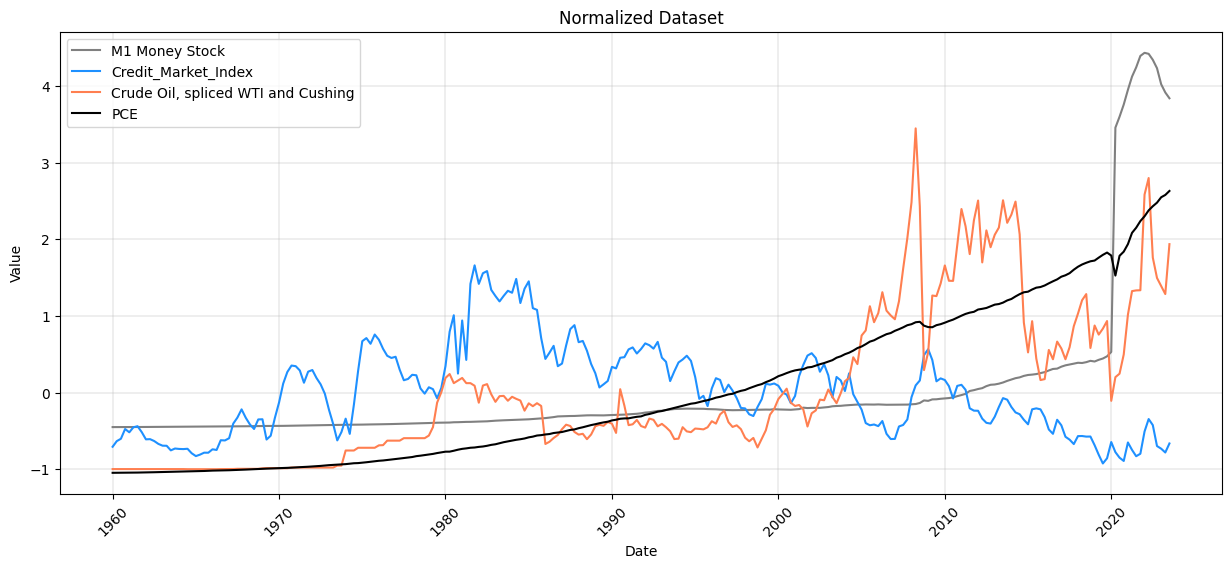

In [24]:
#plot random columns after each transformation
plot_dataset(joined_dataset, "Normalized Dataset")

<div style="color:#00BFFF">

### Inspect and Handle Outliers

Handles outliers in a DataFrame column based on the measure type and reports the removed outliers.

Args:
df (DataFrame): The DataFrame containing the data.
column (str): The name of the column to process.
measure (str): The type of measure for the column.

Returns:
DataFrame, DataFrame: The DataFrame with outliers handled, and DataFrame of removed outliers.

In [25]:
def handle_outliers(df, column, measure):
    
    outlier_values = pd.DataFrame()
    # Z-score method for dollar values and indexes
    z = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 3  # Typically, a threshold of 3 is used
    mask = z > threshold
    outlier_values = df.loc[mask, column].reset_index()
    df.loc[mask, column] = np.nan

    return df, outlier_values

In [26]:

# Initialize a dictionary to store outlier data for each column
all_outliers = {}
columns_with_outliers = {}

# Loop through each column in fred_orig and apply the outlier handling function
for column in joined_dataset.columns:
    # Get the measure type for the column
    measure_type = measure_type_dict.get(column)
    if measure_type:
        # Apply the outlier handling function
        fred_orig, outliers = handle_outliers(joined_dataset, column, measure_type)
        
        # Store the outliers if any
        if not outliers.empty:
            all_outliers[column] = outliers
            # columns_with_outliers.append(column)
            #add to dictionary columns_with_outliers
            columns_with_outliers[column] = outliers.count()[1]

# convert dictionary to dataframe and sort by number of outliers
columns_with_outliers = pd.DataFrame.from_dict(columns_with_outliers, orient='index', columns=['outliers']).sort_values(by='outliers', ascending=False)
print(columns_with_outliers)

                                                   outliers
M1 Money Stock                                           14
Help-Wanted Index for United States                       8
Ratio of Help Wanted/No. Unemployed                       5
Average Duration of Unemployment (Weeks)                  5
Total Reserves of Depository Institutions                 5
Securities in Bank Credit at All Commercial Banks         4
M2 Money Stock                                            3
Initial Claims                                            2
Capacity Utilization: Manufacturing                       1
Civilian Unemployment Rate                                1
Crude Oil, spliced WTI and Cushing                        1


<div style="color:#00BFFF">

### Inspecting and Handling Missing Values

In [27]:
def report_missing_values(df):
    # Check for NaN values in the dataset
    nan_summary = df.isna().sum()

    # Display columns with NaNs and their count, if any
    columns_with_nans = nan_summary[nan_summary > 0]
    if not columns_with_nans.empty:
        print("\nColumns with NaN values and their count:")
        print(columns_with_nans)
    else:
        print("\nNo NaN values found.")

report_missing_values(joined_dataset)


Columns with NaN values and their count:
Capacity Utilization: Manufacturing                   1
Help-Wanted Index for United States                   8
Ratio of Help Wanted/No. Unemployed                   5
Civilian Unemployment Rate                            1
Average Duration of Unemployment (Weeks)              5
Initial Claims                                        2
M1 Money Stock                                       14
M2 Money Stock                                        3
Total Reserves of Depository Institutions             5
Crude Oil, spliced WTI and Cushing                    1
Consumer Sentiment Index                             72
Securities in Bank Credit at All Commercial Banks     4
Stock_Market_Valuation_Index                          1
dtype: int64


In [28]:
def drop_columns_with_many_nans(df, threshold=30):
    """
    Drops columns from the dataframe that have more than a specified number of NaN values.
    """

    # Calculate the count of NaN values per column
    nan_counts = df.isna().sum()
    
    # Identify columns that exceed the threshold for NaN values
    columns_to_drop = nan_counts[nan_counts > threshold].index
    
    # Drop these columns from the dataframe
    df_dropped = df.drop(columns=columns_to_drop)
    
    # Optionally, print the names of dropped columns for review
    if len(columns_to_drop) > 0:
        print(f"Dropped {len(columns_to_drop)} columns with more than {threshold} NaN values:")
        print(columns_to_drop.tolist())
    else:
        print("No columns were dropped based on the threshold criteria.")
    
    return df_dropped


joined_dataset = drop_columns_with_many_nans(joined_dataset, threshold=30)


Dropped 1 columns with more than 30 NaN values:
['Consumer Sentiment Index']


<div style="color:#00BFFF">

### Differencing (through Rate of Change Q-o-Q) 

**Method:** By applying `.diff()` to our dataset, we calculate the rate of change of various indicators from one period to the next. This transformation facilitates more meaningful analysis across diverse data points by standardizing differences, accounting for variations in magnitude and unit measurements.

Utilizing the rate of change is particularly effective in the context of economic data and nowcasting models for several reasons:

**Advantages**

1. **Comparability**: Enhances comparisons across different indicators by normalizing scale and unit differences.
2. **Trend Analysis**: Highlights trends and growth rates, offering deeper insights than absolute levels.
3. **Stationarity**: Aids in achieving stationarity for time series data, a prerequisite for many econometric models.
4. **Handling Non-Linearity**: Log transformations, followed by rate of change calculation, can linearize growth patterns for linear modeling.
5. **Economic Relevance**: Growth rates (rate of change) are often more meaningful in economic contexts, such as GDP growth analysis.

**Considerations**

- **Loss of Level Information**: This method shifts focus from absolute levels, which might still hold relevance.
- **Volatility**: Can amplify volatility, especially for series with minor fluctuations in absolute terms.
- **Interpretability**: It's important to ensure the data remains interpretable and aligned with economic theories and intuition.

In [29]:
joined_dataset = joined_dataset.diff()

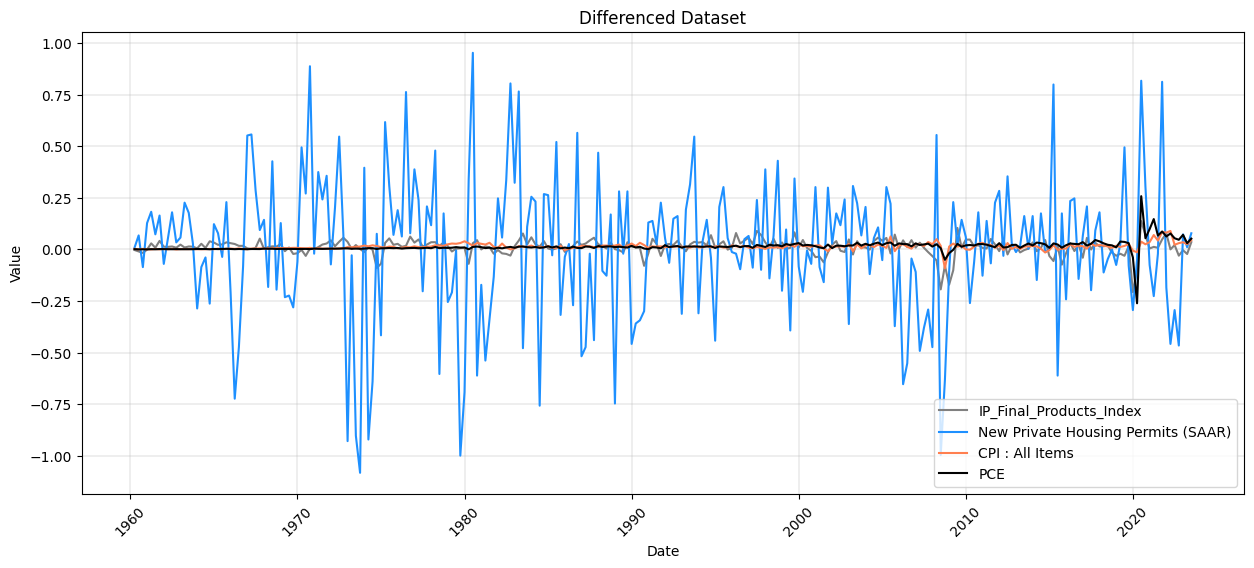

In [44]:
#plot after each transformation
plot_dataset(joined_dataset, "Differenced Dataset")

<div style="color:#00BFFF">

### Stationary Assesment for Joined Dataset


**Stationarity Assessment**: Using tests like the Augmented Dickey-Fuller ensures that our time series data is suitable for modelling and forecasting, as many statistical models require stationarity for valid results.

**Addressing Non-Stationarity**: Techniques such as differencing or transformation will be applied to achieve stationarity, which is crucial for the accuracy and reliability of our predictive models and correlation analysis. 

In [31]:
from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller test for stationarity
def adf_test(series, signif=0.05):

    # Replace infinities with NaNs and then fill them
    series.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Now run the ADF test
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value < signif

#get join_dataset column names in a list and place in key_indicators_for_var to contain valid column names
key_indicators_for_var = joined_dataset.columns.tolist()

# Checking stationarity
stationarity_results = {}
for indicator in key_indicators_for_var:
    if indicator in joined_dataset.columns:
        stationarity_results[indicator] = adf_test(joined_dataset[indicator].dropna())
    else:
        print(f"Indicator {indicator} not found in dataset")

# Print non-stationary indicators
print("Non-stationary Indicators:")
for key, value in stationarity_results.items():
    if not value:
        print(key)
        
        
# could write as next steps to remove non-stationary indicators and re-run correlation analysis

Non-stationary Indicators:
PCE
M1 Money Stock
M2 Money Stock
Real Estate Loans at All Commercial Banks
CPI : All Items
Personal Cons. Expend.: Chain Index
Securities in Bank Credit at All Commercial Banks
Avg_Hourly_Earnings_Employment
Consumer_Spending_Index


<div style="color:#00BFFF">

### Seasonality Assesment for Joined Dataset

In [32]:
from statsmodels.tsa.stattools import acf
import math

# Function to check seasonality
def check_seasonality(series, max_lag, threshold=0.3, seasonal_lags=[4, 8, 12, 16]):
    acf_values = acf(series, nlags=max_lag, fft=True)
    return any(abs(acf_values[lag]) > threshold for lag in seasonal_lags)

# Check for seasonality in each column
seasonality_presence = {col: check_seasonality(joined_dataset[col], max_lag=40) for col in joined_dataset.columns}

# Print indicators with seasonality
print("Indicators with seasonality:")
for key, value in seasonality_presence.items():
    if value == True:
        print(key)

Indicators with seasonality:


In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from matplotlib import dates as mdates

# Function to adjust seasonality
def seasonally_adjust(series, model='additive', period=12):
    result = seasonal_decompose(series, model=model, period=period)
    return result.trend + result.resid  # Assuming an additive model

for indicator, has_seasonality in seasonality_presence.items():
    if has_seasonality:
        # Apply seasonal adjustment to the series
        joined_dataset[indicator] = seasonally_adjust(joined_dataset[indicator])



<div style="color:#00BFFF">

### Initial Correlation Analysis on the Transformed Data and Rate of Change Data

**Why**: 

Given our scenario where we are analyzing a large number of indicators (123) across a lengthy period (1960 to 2023) to find those that best correlate with private consumption expenditure, and we want to `retain NaN` values due to their economic significance, `Spearman's rank correlation` with pairwise deletion seems to be the most appropriate. 

It respects the economic significance of NaN values while providing a robust correlation measure. However, we need to ensure to perform a sensitivity analysis to understand the impact of missing values results. Also, consider the potential for non-random missing data and its implications.

**What**: 
`Spearman's rank correlation` is non-parametric and does not assume a linear relationship between variables, which can be more appropriate for economic data. It also handles NaN values by default in many implementations, like in Python's Pandas library, where it ignores pairs where either value is NaN. 

**Benefits**: 

Accounts for monotonic relationships and is less sensitive to outliers (which is relevant given that you have replaced some extreme values with NaN).

**Spearman's rank correlation for log transformed data**

In [34]:
# Calculate the Spearman's rank correlation with the private consumption expenditure, handling NaNs with pairwise deletion.
correlation_matrix = joined_dataset.corr(method='pearson') #spearman

#target_correlations will have the Spearman's rank correlation coefficients
target_correlations = correlation_matrix['PCE'].sort_values(ascending=False)

# Display the correlations related to 'PCE'
print(target_correlations.head(10))
print('\n')
print(target_correlations.tail(10).sort_values(ascending=True))



PCE                                    1.000000
Civilian Employment                    0.736795
Tertiary_Sector_Employment             0.656029
Public_Sector_Employment               0.530776
CPI : All Items                        0.522975
Ratio of Help Wanted/No. Unemployed    0.514498
Personal Cons. Expend.: Chain Index    0.483361
IP Index                               0.469303
Output_Materials_Index                 0.422192
IP_Prod_Equipment_Index                0.415590
Name: PCE, dtype: float64


Total Reserves of Depository Institutions    -0.514252
Commercial and Industrial Loans              -0.509523
Real M2 Money Stock                          -0.477748
Initial Claims                               -0.476019
Civilian Unemployment Rate                   -0.345433
M2 Money Stock                               -0.253369
Real Personal Income                         -0.200949
Canada / U.S. Foreign Exchange Rate          -0.080125
Total Business: Inventories to Sales Ratio   -0.0606

<div style="color:#00BFFF">

### Save the final cleaned and preprocessed dataframe

In [35]:
# save the data
joined_dataset.to_csv("./results/merged_data/joined_dataset_transformed.csv",index=True)